In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [5]:
train_identity = pd.read_csv("../input/train_identity.csv")
train_transaction = pd.read_csv("../input/train_transaction.csv")
test_identity = pd.read_csv("../input/test_identity.csv")
test_transaction = pd.read_csv("../input/test_transaction.csv")
sub = pd.read_csv("../input/sample_submission.csv")

In [6]:
train_identity.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [7]:
train_transaction.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train = pd.merge(
    train_transaction,
    train_identity,
    on="TransactionID",
    how="left",
)

train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test = pd.merge(
    test_transaction,
    test_identity,
    on="TransactionID",
    how="left",
)

test.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train.isnull().sum().sum()

115523073

In [12]:
test.isnull().sum().sum()

90186908

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

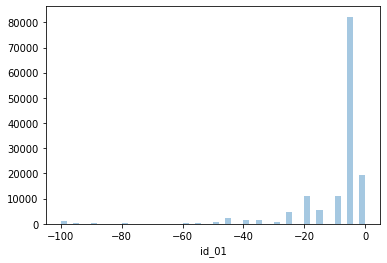

In [18]:
sns.distplot(train["id_01"], kde=False);

In [19]:
train["id_02"].value_counts(dropna=False, normalize=True).head()

NaN       0.761452
1102.0    0.000019
696.0     0.000017
1116.0    0.000015
1120.0    0.000015
Name: id_02, dtype: float64

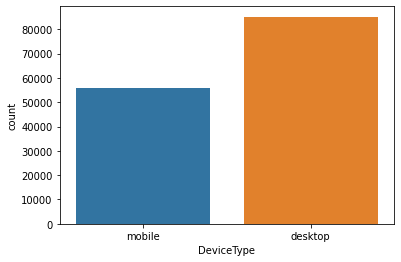

In [20]:
sns.countplot(train["DeviceType"]);

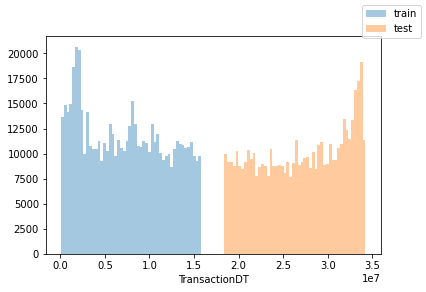

In [35]:
fig = plt.figure()
sns.distplot(train["TransactionDT"], kde=False);
sns.distplot(test["TransactionDT"], kde=False);
fig.legend(labels=['train','test'])
plt.show()

In [45]:
train["TransactionAmt"] / train.groupby(["card1"])["TransactionAmt"].transform("mean")

0         0.194640
1         0.123777
2         0.608150
3         0.405133
4         0.515612
            ...   
590535    0.505177
590536    0.163195
590537    0.258474
590538    0.953051
590539    1.333976
Name: TransactionAmt, Length: 590540, dtype: float64

In [46]:
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', 'tokyo'],
    'food': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4
4,tokyo,apple,150,5
5,tokyo,apple,200,6
6,tokyo,banana,400,7


In [50]:
df.groupby(["city"])["price"].transform("mean")

0    212.5
1    212.5
2    212.5
3    212.5
4    250.0
5    250.0
6    250.0
Name: price, dtype: float64

In [51]:
df.groupby(["city"]).mean()

,price,quantity
city,,
osaka,212.5,2.5
tokyo,250.0,6.0


In [52]:
df.groupby(["city"]).agg("mean")

,price,quantity
city,,
osaka,212.5,2.5
tokyo,250.0,6.0


In [ ]:
train["TransactionAmt_to_mean_card1"] = train["TransactionAmt"] / train. 
train["TransactionAmt_to_mean_card4"] =
test["TransactionAmt_to_mean_card1"] =
test["TransactionAmt_to_mean_card4"] = 

train[""]
train[""]
test[""]
test[""]